# Notes about the SAS's Course
## Statistics 1: Introduction to ANOVA, Regression, and Logistic Regression

This notes is based in the course materials. I made a Jupyter Notebook using JupiterLab with SAS University Edition. 

## 0. Script to setup the sesion
Run this script in the begining the each session to access the data in the correct way. 

In [2]:
%let homefolder=/folders/myfolders/ECST142;

libname STAT1 "&homefolder";

options fmtsearch=(stat1.myfmts);

proc format library=stat1.myfmts;
run;

/* create macro variables to hold the names of the interval and */
/* categorical variables used in the demo and practice programs */

%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom;

%let categorical=House_Style2 Overall_Qual2 Overall_Cond2 Fireplaces 
         Season_Sold Garage_Type_2 Foundation_2 Heating_QC 
         Masonry_Veneer Lot_Shape_2 Central_Air;

## 2. ANOVA and Regression

When we are studying the relation between variables, the first step is to detect potential predictors. After getting the predictors, we use tools like ANOVA and Regression to assess the quality of the relation between the predictors and the response.

### Graphical Analysis of Associations
To do a graphical exploration about the relations between variables in the data we can use boxplots and scatterplot.

First, let's examine the data file. 

In [24]:
proc print data=stat1.ameshousing3 (obs=5); 
run;

Obs,PID,Lot_Area,House_Style,Overall_Qual,Overall_Cond,Year_Built,Heating_QC,Central_Air,Gr_Liv_Area,Bedroom_AbvGr,Fireplaces,Garage_Area,Mo_Sold,Yr_Sold,SalePrice,Basement_Area,Full_Bathroom,Half_Bathroom,Total_Bathroom,Deck_Porch_Area,Age_Sold,Season_Sold,Garage_Type_2,Foundation_2,Masonry_Veneer,Lot_Shape_2,House_Style2,Overall_Qual2,Overall_Cond2,Log_Price,Bonus,score
1,0527127150,4920,1Story,8,5,2001,Ex,Y,1338,2,0,582,4,2010,213500,1338,3,0,3,0,9,2,Attached,Concrete/Slab,N,Regular,1Story,6,5,12.271392112,1,.
2,0527145080,5005,1Story,8,5,1992,Ex,Y,1280,2,0,506,1,2010,191500,1280,2,0,2,226,18,1,Attached,Concrete/Slab,N,Irregular,1Story,6,5,12.162643088,1,.
3,0527425090,10500,1Story,4,5,1971,TA,Y,864,3,1,0,4,2010,115000,864,1,0,1,0,39,2,NA,Cinder Block,N,Regular,1Story,4,5,11.652687407,0,.
4,0528228285,3203,1Story,7,5,2006,Ex,Y,1145,2,0,437,1,2010,160000,1145,2,0,2,216,4,1,Attached,Concrete/Slab,Y,Regular,1Story,6,5,11.982929094,0,.
5,0528250100,7750,SLvl,7,5,2000,Ex,Y,1430,3,1,400,4,2010,180000,384,2,1,2.1,180,10,2,Attached,Concrete/Slab,N,Irregular,SLvl,6,5,12.10071213,1,.


### Demo: Exploring Associations Using PROC SGPLOT

In this case we are goint to check viusally if there is an association between the *air conditioning* (categorical) variable with the *sales price* (continuous) variable, using a boxplot.

We submit this code: 

/*st102d01.sas*/  /*Part C*/

`proc sgplot data=STAT1.ameshousing3;
    vbox SalePrice / category=Central_Air connect=mean;                     
    title "Sale Price Differences across Central Air";
run;`


![title](img/stat1.2.1.png)


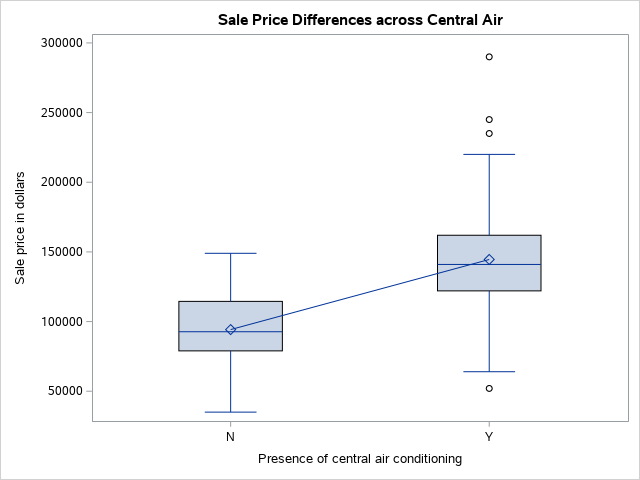

In [22]:
proc sgplot data=STAT1.ameshousing3;
    vbox SalePrice / category=Central_Air connect=mean;                     
    title "Sale Price Differences across Central Air";
run;

The central line is not horizontal, It suggest a relation between the variables. In other words, homes with central air tents to get higher prices. If the model include multiple variables the relations could change.
It represents simple relations. If we add multiples variables in the model the relations could be different. 

### Identifying Associations in Linear Regression with Scatter Plots

Scatter plots are two-dimensional graphs about two continuous variables, describe the relationship between the two variables.
Other uses about this plot:detect outliers, identify trends in your data, identify the range of X and Y values, and communicate the results of a data analysis. 

### Demo: Exploring Associations Using PROC SGSCATTER

The goal is take a general idea about the asociation between sales price (response variable) and the others variables (predictors), and the shape about that association. 

/*st102d01.sas*/  /*Part A*/
`proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*Gr_Liv_Area / reg;
    title "Associations of Above Grade Living Area with Sale Price";
run;`



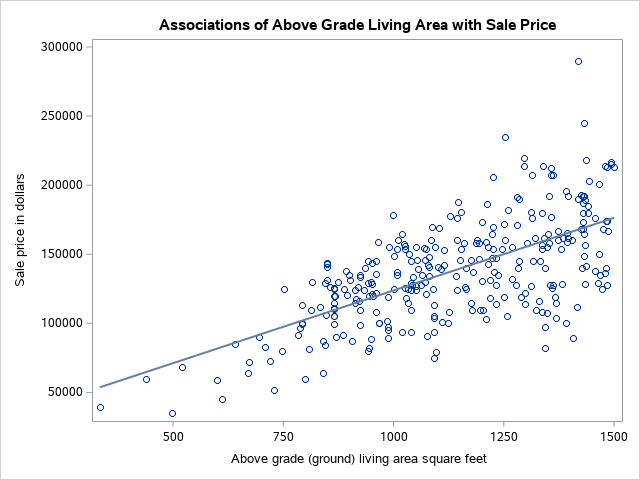

In [25]:
/*st102d01.sas*/  /*Part A*/
proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*Gr_Liv_Area / reg;
    title "Associations of Above Grade Living Area with Sale Price";
run;

the form of the plot suggest a lineal asociation between both variables, it suggest the there are more dispersion when the above ground is bigger.

Now lets make a panel of scatter

`/*PROC SGSCATTER is used to explore relationships among continuous variables*/
/*using scatter plots*/
options nolabel;
proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*(&interval) / reg;
    title "Associations of Interval Variables with Sale Price";
run;`



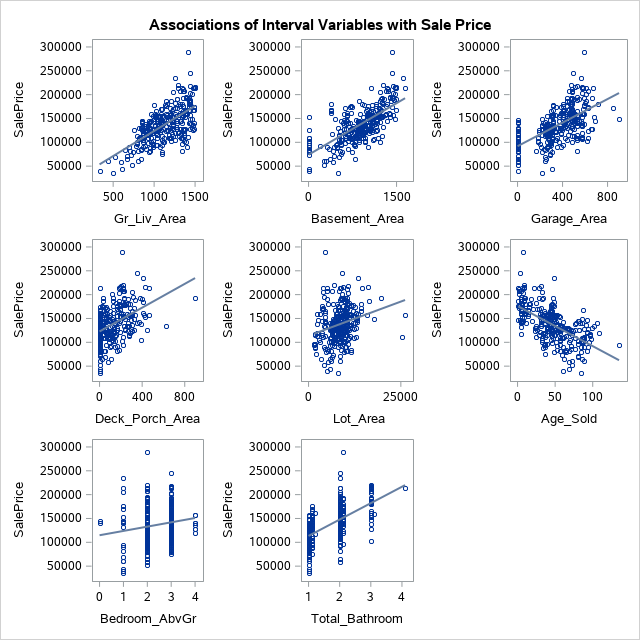

In [7]:
/*st102d01.sas*/  /*Part B*/
/*PROC SGSCATTER is used to explore relationships among continuous variables*/
/*using scatter plots*/
options nolabel;
proc sgscatter data=STAT1.ameshousing3;
    plot SalePrice*(&interval) / reg;
    title "Associations of Interval Variables with Sale Price";
run;

### One-Way ANOVA

#### The ANOVA Hypothesis
With ANOVA, the null hypothesis is that the population means are equal.

#### Partitioning Variability in ANOVA
In ANOVA, the goal is to determine whether there are significant differences among the group means.Total Variation in the response variable (as measured by the corrected total sum of squares) into two components, the Between Group Variation (displayed in the ANOVA table as the Model Sum of Squares) and the Within Group Variation (displayed as the Error Sum of Squares).

#### F Statistic and Critical Values
We have to create our Analysis of Variance Table.
The degrees of freedom (DF) represent the number of independent pieces of information that go into each calculation.

#### The ANOVA Model
This mathematical model is a way to represent the relationship between the response and predictor variables in ANOVA.
the predicted values in ANOVA are the group means.
the validity of the p-value depends on the data meeting the assumptions for ANOVA:
1. The first assumption is the independence of the observations.
2. The second assumption is that the error terms are normally distributed for every group or treatment.
3. The third assumption is that the error terms have equal variances across treatments. PLot the residuals with the prdicted values is a way to check this assumption.

#### Demo: Performing a One-Way ANOVA Using PROC GLM
we are to run an Analysis of Variance to test if there are differences in the sales price with the heating quality. 
first we check the assumptions of the model.

the data has this variables: 

In [12]:
/*st102d02.sas*/
proc print data=STAT1.ameshousing3(obs=3);
run;

Obs,PID,Lot_Area,House_Style,Overall_Qual,Overall_Cond,Year_Built,Heating_QC,Central_Air,Gr_Liv_Area,Bedroom_AbvGr,Fireplaces,Garage_Area,Mo_Sold,Yr_Sold,SalePrice,Basement_Area,Full_Bathroom,Half_Bathroom,Total_Bathroom,Deck_Porch_Area,Age_Sold,Season_Sold,Garage_Type_2,Foundation_2,Masonry_Veneer,Lot_Shape_2,House_Style2,Overall_Qual2,Overall_Cond2,Log_Price,Bonus,score
1,0527127150,4920,1Story,8,5,2001,Ex,Y,1338,2,0,582,4,2010,213500,1338,3,0,3,0,9,2,Attached,Concrete/Slab,N,Regular,1Story,6,5,12.271392112,1,.
2,0527145080,5005,1Story,8,5,1992,Ex,Y,1280,2,0,506,1,2010,191500,1280,2,0,2,226,18,1,Attached,Concrete/Slab,N,Irregular,1Story,6,5,12.162643088,1,.
3,0527425090,10500,1Story,4,5,1971,TA,Y,864,3,1,0,4,2010,115000,864,1,0,1,0,39,2,NA,Cinder Block,N,Regular,1Story,4,5,11.652687407,0,.


The ProcGLM is in the test is above. The null hypothesis is 'all variances group' are equal.If the p-value is greater than .05 then we can't reject the null hypotesis. 


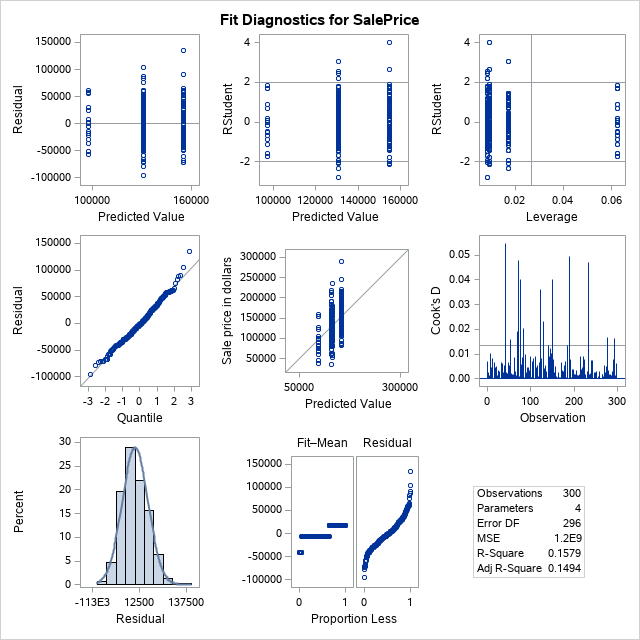
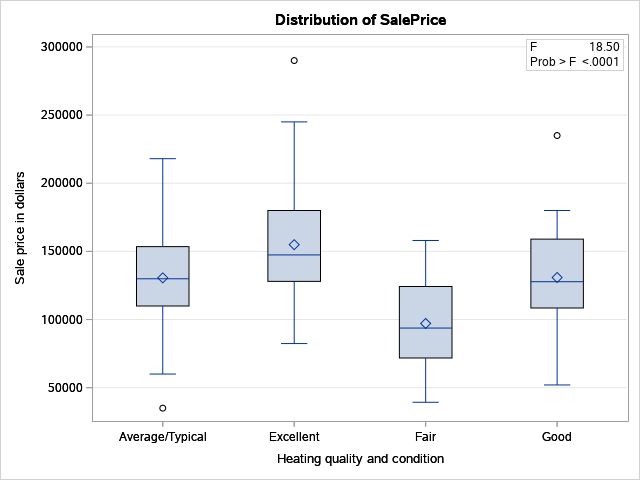
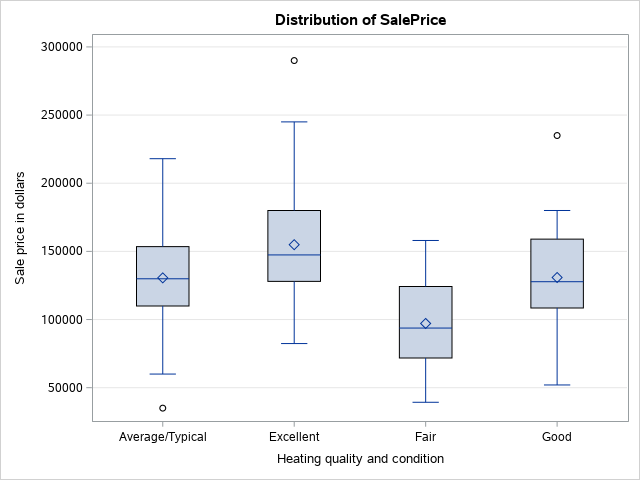

In [8]:
/*st102d02.sas*/
ods graphics;

proc glm data=STAT1.ameshousing3 plots=diagnostics;
   class Heating_QC;
   model SalePrice=Heating_QC;
   means Heating_QC / hovtest=levene;
   format Heating_QC $Heating_QC.;
   title "One-Way ANOVA with Heating Quality as Predictor";
run;
quit;

title;

** Conclutions about the results in ANOVA:** 
* the p-value is <.001, we reject the null hypotesis and it indicates that at least a sales prices mean is different for the levels of heating queality.
* R-square is .1579, it suggest that the 15.79% de variation in the sales price is about the heating quality.
* the Tipe I SS especify the sum of squares for adding effects in to the model sequentally. In a one way ANOVA, only a single effect is included.
* in the plots for -fit diagnoctics- predited vs residuals dont'n seems  with any pattern
* in the plots for -fit diagnoctics- the qqplot looks like the dots fits in the lane and the histogram to the residuals seems simmetric. it suggest the assumption about normality is true.  
* in he box plot, the variability in the four groups looks like similar.
* The levine test has a p-value of .63, the null hypotesis is not reject and it indicates the variances in the four 

#### Practice: Using the One-Way ANOVA Task to Perform a One-Way ANOVA
Montana Gourmet Garlic is a company that uses organic methods to grow garlic. It specializes in hardneck varieties. Knowing a little about experimental methods, the owners design an experiment to test whether growth of the garlic is affected by the type of fertilizer. They limit the experimentation to a Rocambole variety named Spanish Roja, and test three organic fertilizers and one chemical fertilizer (as a control). They "blind" themselves to the fertilizer by using containers with numbers 1 through 4. (In other words, they design the experiment in such a way that they do not know which fertilizer is in which container.) One acre of farmland is set aside for the experiment. The land is divided into 32 beds, and they randomly assign fertilizers to the beds. At harvest, they calculate the average weight of garlic bulbs in each of the beds. The data are in the garlic data set.

Consider an experiment to study four types of fertilizer, labeled 1, 2, 3, and 4. One fertilizer is chemical and the rest are organic. You want to see whether the average weights of the garlic bulbs are significantly different for plants in beds that use different fertilizers.
Test the hypothesis that the means are equal. Use the Summary Statistics task to generate descriptive statistics for the four groups.

* Use the Box Plot task to produce box plots of bulb weight for the four groups.
* Which fertilizer has the highest mean?
* Perform a one-way ANOVA using the One-Way ANOVA task. Be sure to check that the assumptions of the analysis method that you choose are met.
* What conclusions can you reach at this point in your analysis?

**Solution:**

make a test the hypothesis that the means of the weights of the garlics bulbs are significantly differents for the differents fertizers. Use PROC MEANS to generate descriptive statistics for the four groups, and use PROC SGPLOT to produce box plots of bulb weight for the four groups. Submit the code and view the results.

First let's check the data to analyze

In [14]:
proc print data=stat1.garlic (obs=3); 
run;

Obs,BedID,Fertilizer,BulbWt
1,101,1,0.23916
2,102,1,0.25828
3,103,1,0.20479


Now Checking Assumptions, to run the proc Means and the proc Sgplot:

* Use the Box Plot task to produce box plots of bulb weight for the four groups.


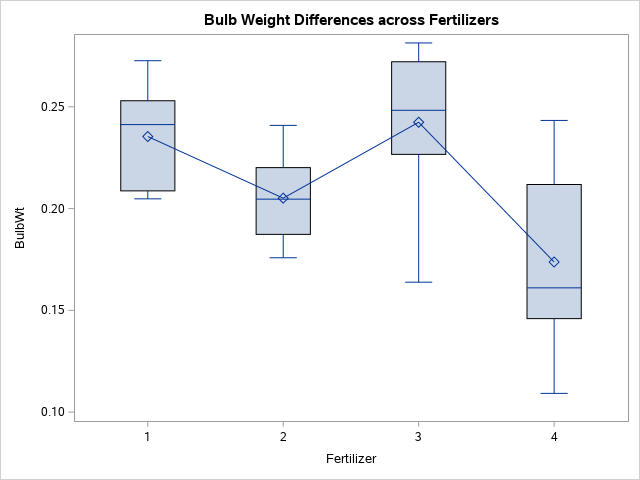

In [16]:
/*st102s01.sas*/  /*Part A*/
proc means data=stat1.garlic; 
   var BulbWt;
   class Fertilizer;
   title 'Descriptive Statistics of BulbWt by Fertilizer';
run;

proc sgplot data=stat1.garlic;
    vbox BulbWt / category=Fertilizer 
                  connect=mean;
    title "Bulb Weight Differences across Fertilizers";
run;

title;

* Which fertilizer has the highest mean?
The ferilizer 3, with 0.2424075

* Perform a one-way ANOVA using the One-Way ANOVA task. Be sure to check that the assumptions of the analysis method that you choose are met.


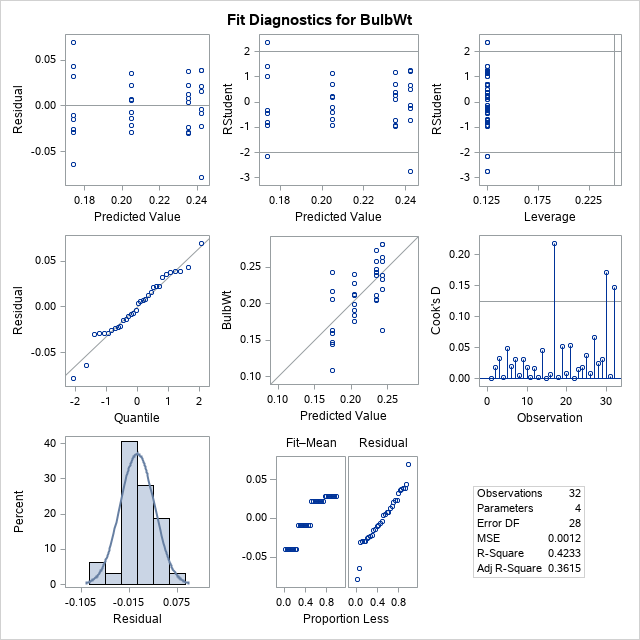
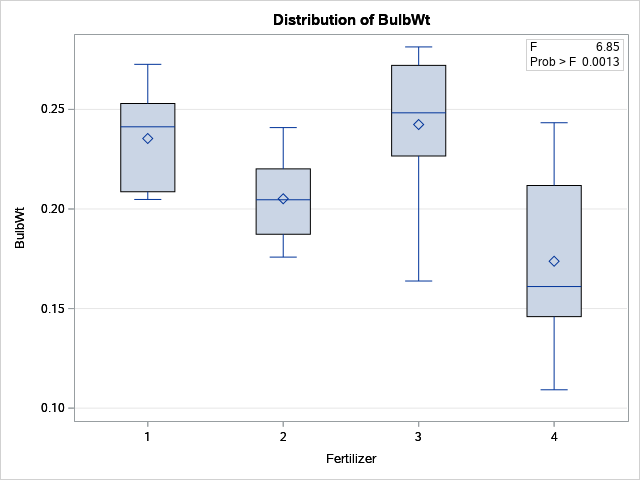
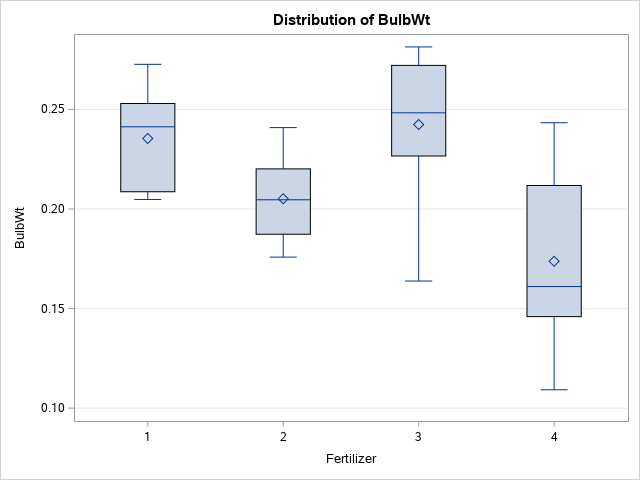

In [18]:
/*st102s01.sas*/  /*Part B*/
ods graphics;

proc glm data=stat1.garlic plots=diagnostics;
    class Fertilizer;
    model BulbWt=Fertilizer;
    means Fertilizer / hovtest=levene;
    title "One-Way ANOVA with Fertilizer as Predictor";
run;
quit;

title;

**Conclutions about the results of ANOVA:**

* the p-value is <.001, it indicates that we have to reject the null hypotesis, at least a weigth bulbs mean is different for the levels of fertilizers.
* R-square is .4232, it suggest that the 42.32% of variation in the weigth bulbs is explained by th use of differents fertilizers.
* the Tipe I SS especify the sum of squares for adding effects in to the model sequentally. In a one way ANOVA, only a single effect is included.
* in the plots for -fit diagnoctics- predited vs residuals dont'n seems  with any pattern, it indicates independence between the observations. 
* in the plots for -fit diagnoctics- the qqplot looks like the dots fits in the lane and the histogram to the residuals seems simmetric. it suggest the assumption about normality is true.  
* The levine test has a p-value of .63, the null hypotesis is not reject and it indicates the variances in the four 

### ANOVA Post Hoc Tests

 Multiple comparison procedures, will determine which pairs of groups are significantly different.
 
 To determinate what combination of pair test comaprison are different from others, the error Tipe I (probability of incorrectly rejecting the null hypothesis) increment unless controll it using some techniques. The number of treatments/factor/levels in the predictor variable give the number of pairwise comparisons, if you have 4 levels, then numerber of comparisons are 6 (C(4,2)=6), The next table shows the probability en some number of pairwise comparisons. 
 
![title](img/stat1.2.2.jpg)

#### Tukey's and Dunnett's Multiple Comparison Methods

The Tukey method, controls the EER to equal the alpha level that you specify. Dunnett's method enables you to compare a single control group, to all other groups. 

#### Diffograms and Control Plots
...

#### Demo: Performing a Post Hoc Pairwise Comparison Using PROC GLM
...

**Questions**

![title](img/ANOVA_PostHocTests_q1.jpg)

![title](img/ANOVA_PostHocTests_q2.jpg)

#### Practice: Post Hoc Pairwise Comparisons
Consider the analysis of the garlic data set. In the previous exercise, you used PROC GLM to perform one-way ANOVA, and found that there was a statistically significant difference among mean garlic bulb weights for the different fertilizers. Now, perform a post hoc test to look at the individual differences among means

1. Use the One-Way ANOVA task to conduct pairwise comparisons with an experimentwise error rate of α=0.05. (Use the Tukey adjustment.)
2. Which types of fertilizer are significantly different?
3. Modify the task to use level 4 (the chemical fertilizer) as the control group and perform a Dunnett's comparison with the organic fertilizers to see whether they  affected the average weights of garlic bulbs differently from the control fertilizer.
4. Which types of fertilizer are significantly different?
5. Challenge: Perform unadjusted tests of all pairwise comparisons to see what would happen if the multi-test adjustments were not made.
6. How do the results compare to what you saw in the Tukey adjusted tests?

**Solution:**

1. Use the One-Way ANOVA task to conduct pairwise comparisons with an experimentwise error rate of α=0.05. (Use the Tukey adjustment.)


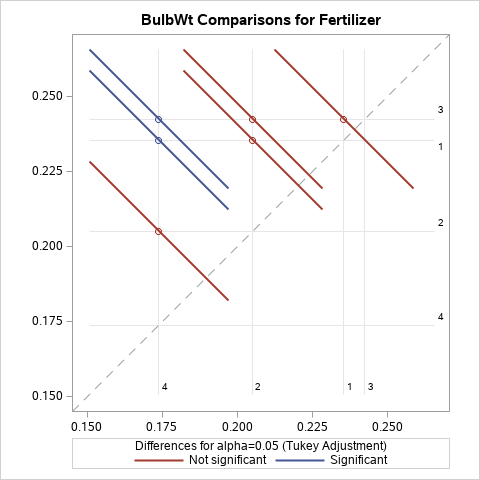

In [20]:
/*st102s02.sas*/
ods graphics;

ods select lsmeans diff diffplot controlplot;
proc glm data=STAT1.Garlic 
         plots(only)=(diffplot(center) controlplot);
   class Fertilizer;
   model BulbWt=Fertilizer;
   Tukey: lsmeans Fertilizer / pdiff=all adjust=tukey;
   title "Post-Hoc Analysis of ANOVA - Fertilizer as Predictor";
run;
quit;

title;

2. Which types of fertilizer are significantly different?: 
*significant differences between fertilizers 3 and 4 (p=0.0020) and 1 and 4 (p=0.0058)*

3. Modify the task to use level 4 (the chemical fertilizer) as the control group and perform a Dunnett's comparison with the organic fertilizers to see whether they  affected the average weights of garlic bulbs differently from the control fertilizer.


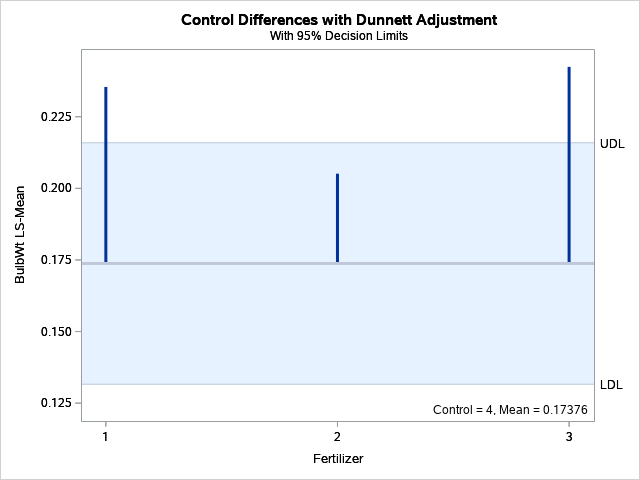

In [21]:
/*st102s02.sas*/
ods graphics;

ods select lsmeans diff diffplot controlplot;
proc glm data=STAT1.Garlic 
         plots(only)=(diffplot(center) controlplot);
   class Fertilizer;
   model BulbWt=Fertilizer;
   Dunnett:lsmeans Fertilizer / pdiff=control('4') adjust=dunnett;
   title "Post-Hoc Analysis of ANOVA - Fertilizer as Predictor";
run;
quit;

title;

4. Which types of fertilizer are significantly different?: *3 versus 4 p=0.0011, 1 versus 4 p=0.0031*

5. Challenge: Perform unadjusted tests of all pairwise comparisons to see what would happen if the multi-test adjustments were not made.


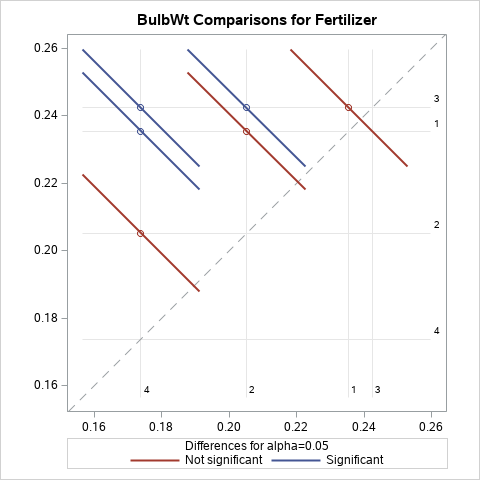

In [22]:
/*st102s02.sas*/
ods graphics;

ods select lsmeans diff diffplot controlplot;
proc glm data=STAT1.Garlic 
         plots(only)=(diffplot(center) controlplot);
   class Fertilizer;
   model BulbWt=Fertilizer;
   No_Adjust: lsmeans Fertilizer / pdiff=all adjust=t;
   title "Post-Hoc Analysis of ANOVA - Fertilizer as Predictor";
run;
quit;

title;

6. How do the results compare to what you saw in the Tukey adjusted tests?: *The unadjusted (t test) comparisons have smaller p-values than they had with Tukey adjustments. One additional comparison has a p-value below 0.05 (2 versus 3).*

### Pearson Correlation

we want to determine which continuous variables are correlated with continuos response variable before we create a regression model.

#### Using Correlation to Measure Relationships between Continuous Variables
...

#### Hypothesis Testing for a Correlation
...

#### Question
![title](img/ANOVA_Pearson_q1.jpg)

#### Common Errors When Interpreting Correlations

1. correlation does not imply causation.
> * First, the variables might be related, but not causally.
> * second, sample correlation coefficients can be large, because both variables are affected by other variables.
2. misinterpreting the type of relationship between variables.
3. failing to recognize the influence of outliers on the correlation. 

#### Demo: Producing Correlation Statistics and Scatter Plots Using PROC CORR

The goal is to identify visually and numerically, which predictors are linearly associated with the response variable.


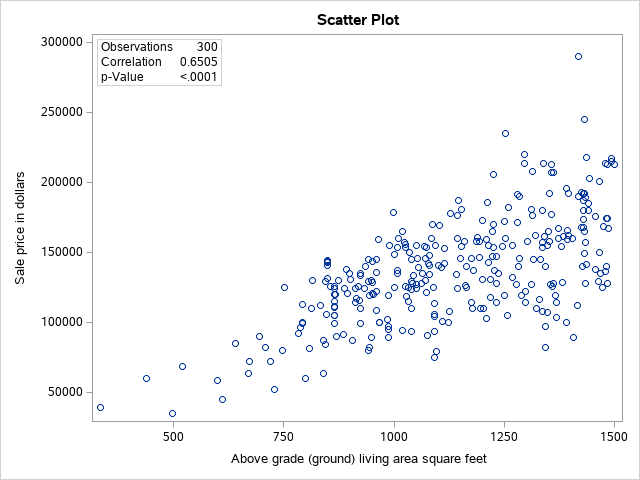
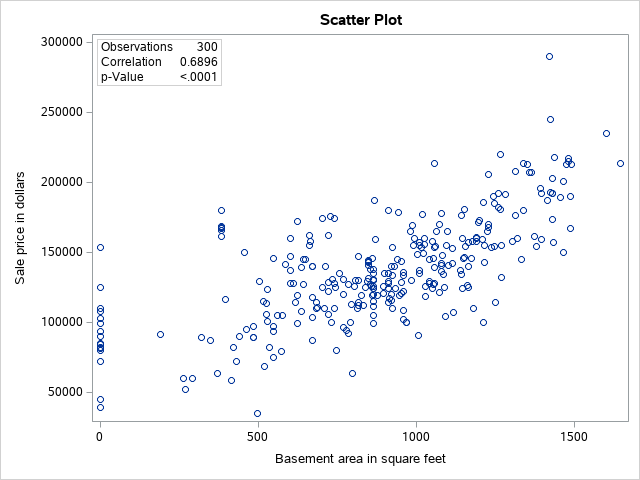
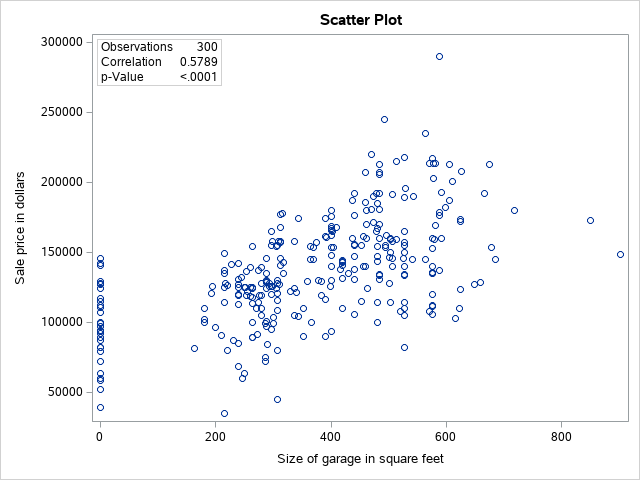
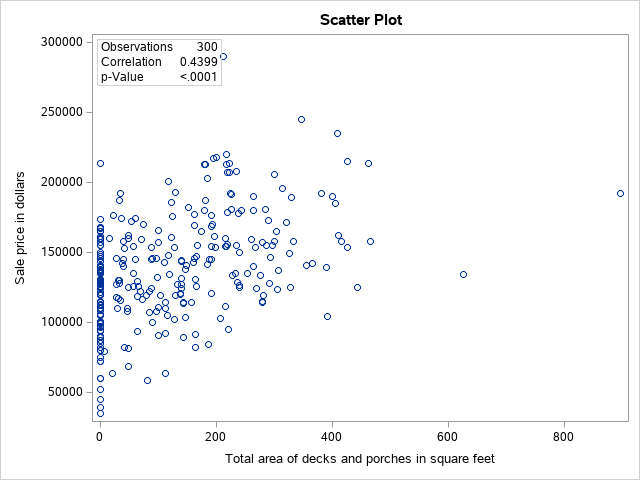
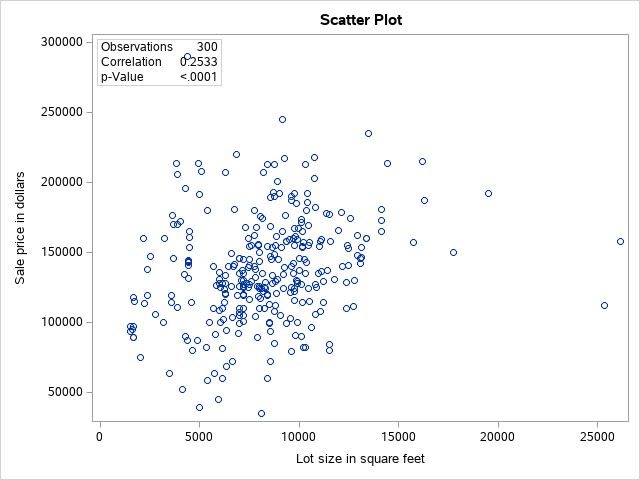
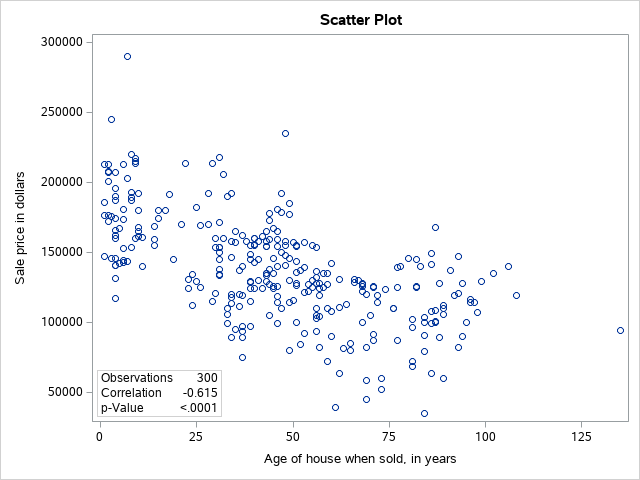
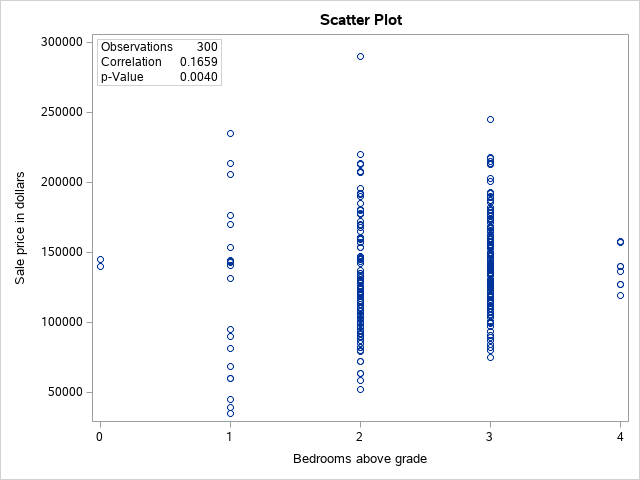
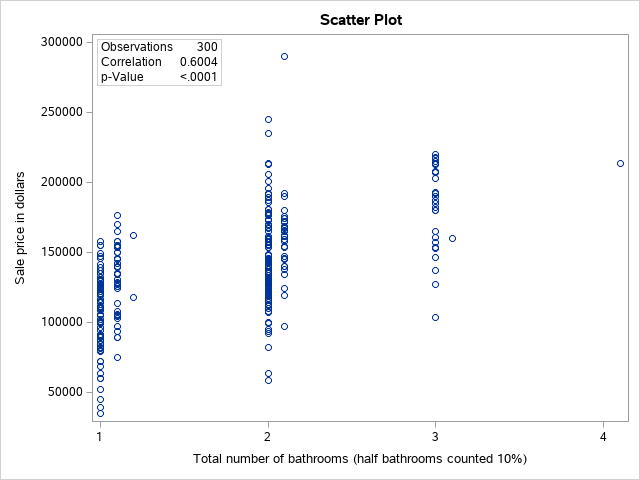

In [30]:
/*st102d04.sas*/  /*Part A*/
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom;

ods graphics / imagemap;
proc corr data=STAT1.AmesHousing3 rank
          plots(only)=scatter(nvar=all ellipse=none);
   var &interval;
   with SalePrice;
   id PID;
   title "Correlations and Scatter Plots with SalePrice";
run;

title;

When you prepare to conduct a regression analysis, it's always a good practice to examine the correlations among the potential predictor variables. This is because strong correlations among predictors included in the same model can cause a variety of problems, like multicollinearity.Now, we want to produce a correlation matrix to help us compare the relationships between predictor variables. The correlation matrix shows correlations and p-values for all combinations of the predictor variables. Here we'll limit our attention to the strongest three correlations with each predictor.In this PROC CORR statement, we're using the NOSIMPLE option to suppress the printing of the simple descriptive statistics for each variable. The BEST= option prints the n highest correlation coefficients for each variable, so in this case, the three strongest correlations.


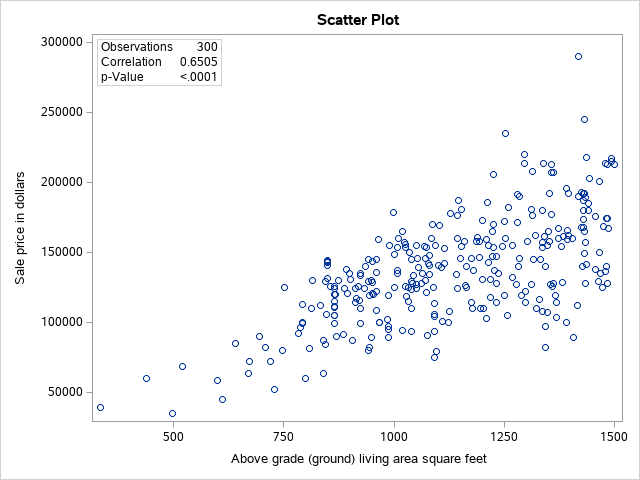
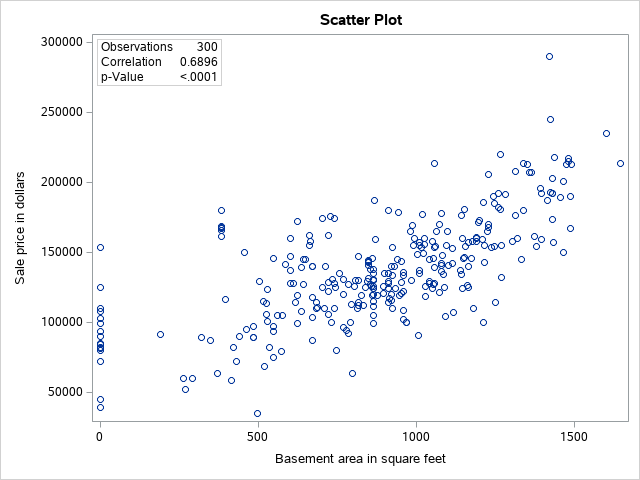
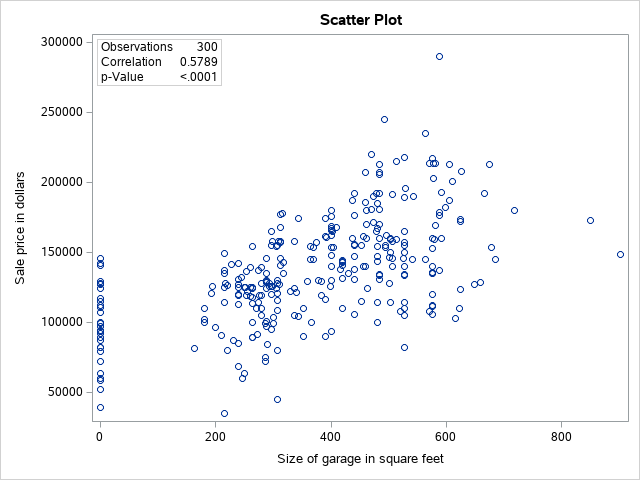
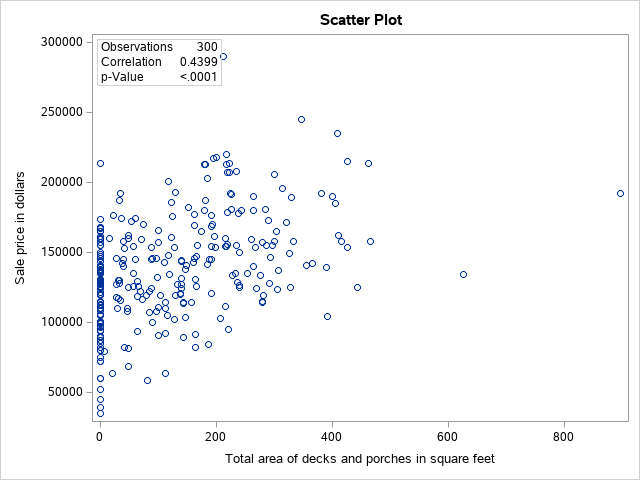
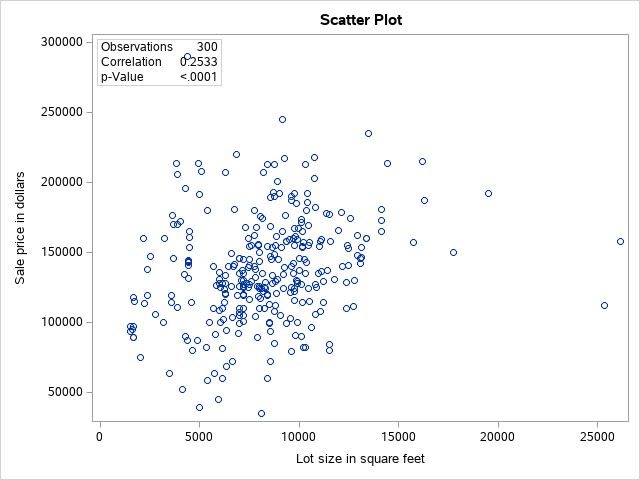
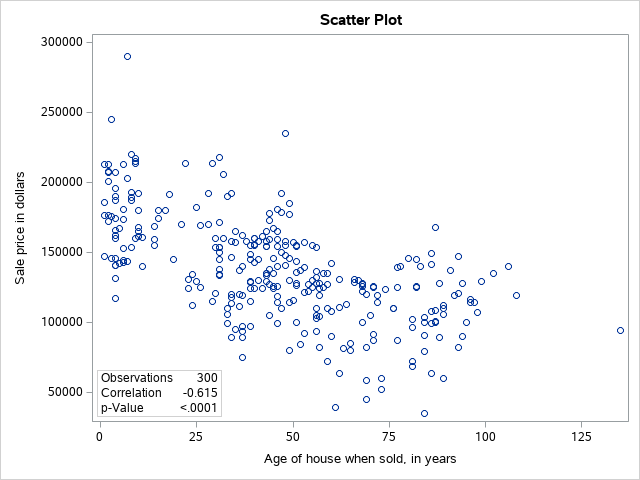
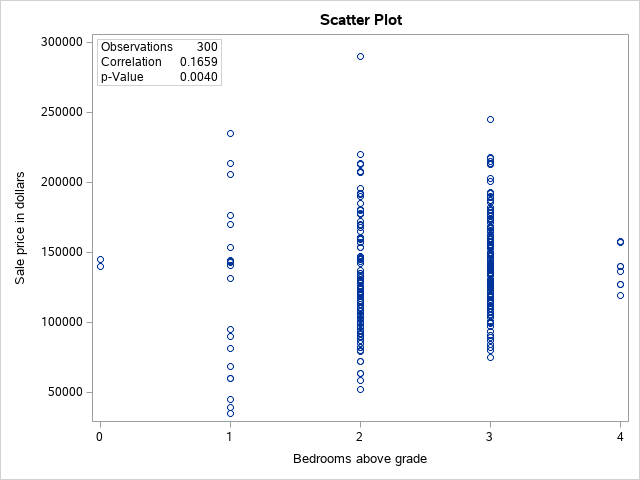
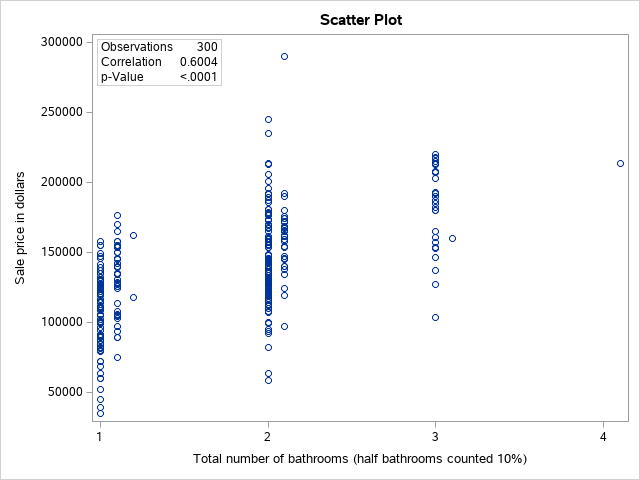

In [31]:
/*st102d04.sas*/  /*Part A*/
%let interval=Gr_Liv_Area Basement_Area Garage_Area Deck_Porch_Area 
         Lot_Area Age_Sold Bedroom_AbvGr Total_Bathroom;

ods graphics / /*reset=all*/ imagemap;
proc corr data=STAT1.AmesHousing3 rank
          plots(only)=scatter(nvar=all ellipse=none);
   var &interval;
   with SalePrice;
   id PID;
   title "Correlations and Scatter Plots with SalePrice";
run;

title;


In [32]:
/*st102d04.sas*/  /*Part B*/
ods graphics off;
proc corr data=STAT1.AmesHousing3 
          nosimple 
          best=3;
   var &interval;
   title "Correlations and Scatter Plot Matrix of Predictors";
run;

title;